In [1]:
import json
import pytesseract
import cv2
import numpy as np
import sys
import re
import os
from PIL import Image
import ftfy
import pan_read           
import aadhaar_read
import io
import cv2
import spacy
import numpy as np
import pytesseract
import re, os, time, json
from pathlib import Path
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [25]:
img = cv2.imread("front_aadhaar.jpg")
img = cv2.resize(img, None, fx=2, fy=2,interpolation=cv2.INTER_CUBIC)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
var = cv2.Laplacian(img, cv2.CV_64F).var()
if var < 10:
    print("Image is Too Blurry....")

In [2]:
filename = "3421721_1697269357_address_back.jpg"
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(Image.open(filename), lang = 'eng+hin+kan')
print(text)
text_output = open('output.txt', 'w', encoding='utf-8')
text_output.write(text)
text_output.close()

file = open('output.txt', 'r', encoding='utf-8')
text = file.read()

text = ftfy.fix_text(text)
text = ftfy.fix_encoding(text)

/

=. a ೫೫೫2 ree ater प्राशिकरण चाशिक

೯

$27.क्‍:88.2--45» की
आधार ॥

Weal Address

S/O ತರರ್ಗತ अत्तर, 228, ಕರಾ, = S/O Sarvarsab Attar, 228, Hotta,

मु पोस्ट alsa, ता. देगलूर जिल्हा At. Post Hottal, Tq. Degiur Dist

नादेंड, होतल, नांदेड, Fieaw Nanded, Hotal, Nanded, Hottal,
महाराष्ट्र, 431717 Maharashtra, 431717

ae
= =

heip ಈ ಊ೮೨೩:. ೦೦೪.೪



In [6]:
text

'/\n\n=. a ೫೫೫2 ree ater प्राशिकरण चाशिक\n\n೯\n\n$27.क्\u200d:88.2--45» की\nआधार ॥\n\nWeal Address\n\nS/O ತರರ್ಗತ अत्तर, 228, ಕರಾ, = S/O Sarvarsab Attar, 228, Hotta,\n\nमु पोस्ट alsa, ता. देगलूर जिल्हा At. Post Hottal, Tq. Degiur Dist\n\nनादेंड, होतल, नांदेड, Fieaw Nanded, Hotal, Nanded, Hottal,\nमहाराष्ट्र, 431717 Maharashtra, 431717\n\nae\n= =\n\nheip ಈ ಊ೮೨೩:. ೦೦೪.೪\n'

In [7]:
if "income" in text.lower() or "tax" in text.lower() or "department" in text.lower():
    data = pan_read.pan_read_data(text)
elif "male" in text.lower():
    data = aadhaar_read.adhaar_read_data(text)

In [9]:
aadhaar_read.adhaar_read_data(text)

Aadhar number not read


{'Name': '/',
 'Date of Birth': 'िकरणचाशिक',
 'Adhaar Number': '೫೫೫2 ',
 'Sex': 'MALE',
 'ID Type': 'Adhaar'}

In [16]:
import keras_ocr
import matplotlib.pyplot as plt

pipeline = keras_ocr.pipeline.Pipeline()
# Read images from folder path to image object
images = [
    keras_ocr.tools.read(img) for img in ['back_aadhaar.jpg',
                                          'front_aadhaar.jpg',]
]

Looking for C:\Users\Anuj\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Anuj\.keras-ocr\crnn_kurapan.h5


4/4 [==============================] - 7s 1s/step


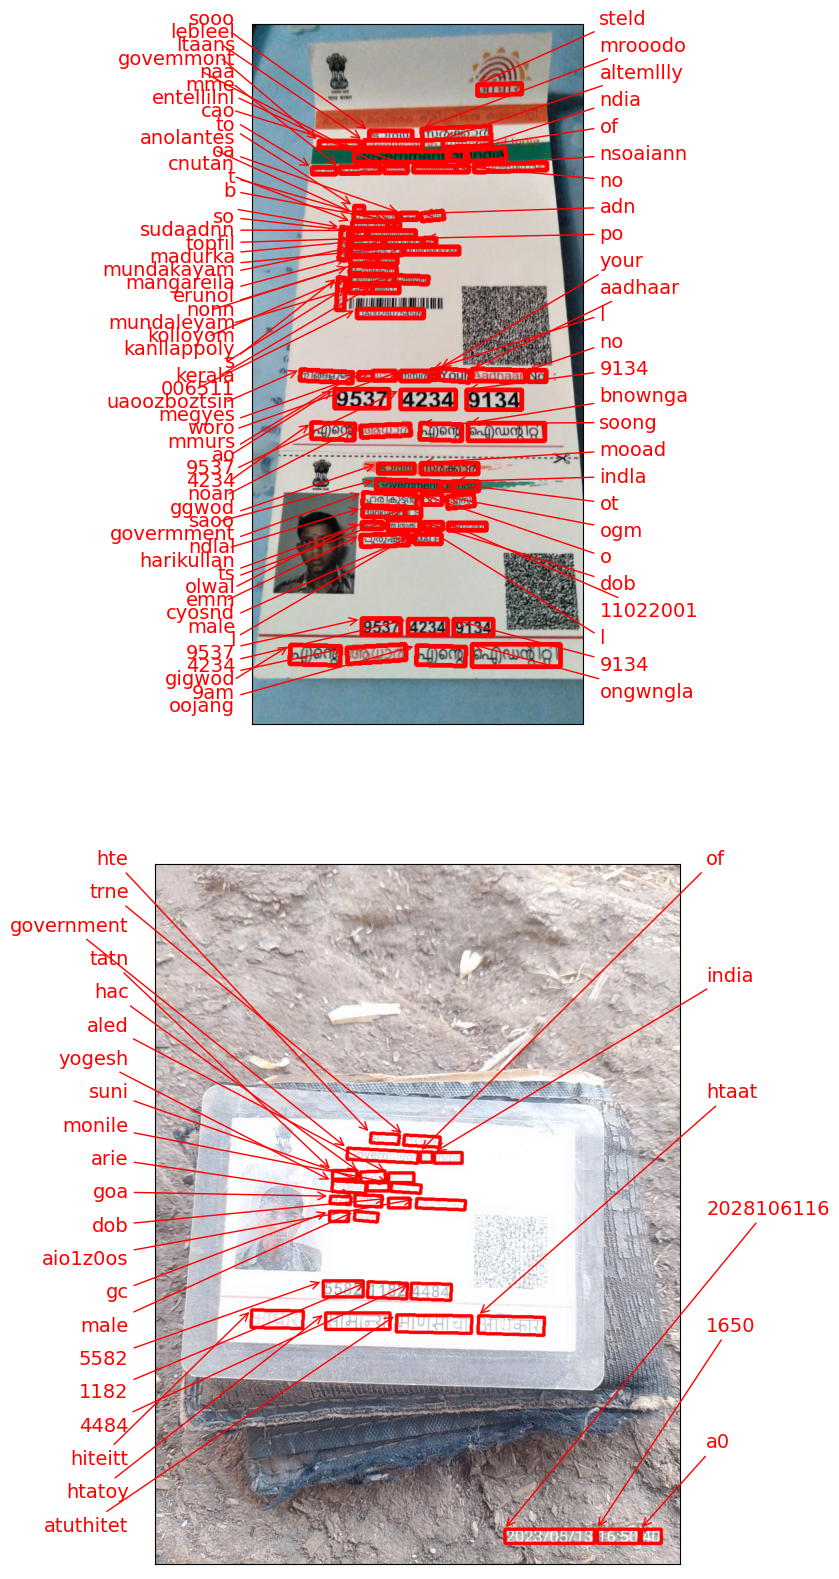

In [17]:
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)

In [19]:
predicted_image = prediction_groups[0]
for text, box in predicted_image:
    print(text)

steld
mrooodo
sooo
altemllly
lebleel
ltaans
ndia
of
govemmont
nsoaiann
no
naa
mme
entellilnl
cao
to
adn
anolantes
oa
cnutan
t
b

so
sudaadnn
po
topfil
madurka
mundakayam
mangareila
erunol
nonn
mundaleyam
kolloyom
kanllappoly
s
kerala
006511
uaoozboztsin
your
megyes
l
aadhaar
no
woro
mmurs
ao
9537
4234
9134
noan
ggwod
bnownga
soong
mooad
saoo
govermment
indla
ot
ndlal
o
ogm
harikullan
ts
olwal
emm
dob
l
11022001
cyosnd
male
l
9537
4234
9134
ongwngla
gigwod
9am
oojang


In [17]:
img = cv2.imread("3421721_1697269357_address_back.jpg")

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.imwrite('test.png', gray)
settings = ('-l eng --oem 3 --psm 11')
bounding_boxes = pytesseract.image_to_boxes(Image.open('test.png'),config=settings)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(Image.open('test.png'), lang = 'eng')

In [18]:
text

'=\n\n_ 2 z 3 7 rrTte ™ —- :\nAutr of India\nAddress\n\nS/O Wravela Heat, 228, era S/O Sarvarsab Attar, 228. Hottal.\nq Gree alsa, ar QaTaAL facet At. Post Hottal, Tq. Degiur Dist\nMes, Baa, Aes, Bireaw Nanded, Hotal, Nanded. Hottal,\nABRs, 431717 Maharashtra, 431717\n\n6160\n= oc\n\nheip @ uida:.gov.in\n\n'

In [30]:
rows = bounding_boxes.split("\n")

hsize = Image.open('test.png').size[1]
chars = []
for row in rows:
    tokens = row.split(" ")
    if len(tokens)<6:
        continue
    char = {'text':tokens[0], 'x1':int(tokens[1]), 'y1':hsize-int(tokens[4]), 'x2':int(tokens[3]), 'y2':hsize-int(tokens[2])}
    chars.append(char)
print(chars)
#words = chars_to_words(chars)
#lines = words_to_lines(words)

[{'text': '=', 'x1': 1258, 'y1': 432, 'x2': 1281, 'y2': 458}, {'text': 'i', 'x1': 229, 'y1': 487, 'x2': 245, 'y2': 512}, {'text': 's', 'x1': 247, 'y1': 499, 'x2': 280, 'y2': 528}, {'text': 's', 'x1': 1561, 'y1': 648, 'x2': 1572, 'y2': 656}, {'text': 't', 'x1': 1580, 'y1': 645, 'x2': 1589, 'y2': 657}, {'text': 'p', 'x1': 1574, 'y1': 645, 'x2': 1645, 'y2': 657}, {'text': '~', 'x1': 2285, 'y1': 635, 'x2': 2311, 'y2': 644}, {'text': 'o', 'x1': 2311, 'y1': 623, 'x2': 2332, 'y2': 632}, {'text': 'e', 'x1': 2359, 'y1': 624, 'x2': 2373, 'y2': 632}, {'text': 'J', 'x1': 2363, 'y1': 634, 'x2': 2396, 'y2': 650}, {'text': 's', 'x1': 1535, 'y1': 657, 'x2': 1571, 'y2': 685}, {'text': 'i', 'x1': 1586, 'y1': 660, 'x2': 1590, 'y2': 669}, {'text': 'c', 'x1': 1604, 'y1': 661, 'x2': 1643, 'y2': 679}, {'text': 'v', 'x1': 1646, 'y1': 650, 'x2': 1690, 'y2': 679}, {'text': 'y', 'x1': 1691, 'y1': 651, 'x2': 1716, 'y2': 694}, {'text': 'C', 'x1': 1768, 'y1': 653, 'x2': 1781, 'y2': 660}, {'text': 'r', 'x1': 1782, '

In [38]:
ocr_text = pytesseract.image_to_string(
Image.open('test.png'), config=f'-l eng --psm 6 --oem 3 ')
# print(ocr_text)


try:
    address_start = ocr_text.find('Address')
    address = ocr_text[address_start+8:]
    pinpatn = r'[0-9]{6}'
    address_end = 0
    pinloc = re.search(pinpatn, address)
    if pinloc:
        address_end = pinloc.end() 
    else:
        print('Pin code not found in address')
        address = re.sub('\n', ' ', address[:address_end])
    address = address[:address_end]
    print(address)
except:
    address = re.sub('\n', ' ', ocr_text)
    pinpatn = re.compile(r'[0-9]{6}')
    pincode = re.search(pinpatn, address)
    # print(pincode.group())
    print(pincode.group())


S/O Hiavara Heat, 228, alee. S/O Sarvarsab Attar, 228, Hottal, | ,
“ A. Gee Blea, a. Qareax Freer = Att. Post Hottal, Tq. Deglur Dist | .
aes, Baa, Aes, areaews Nanded, Hotal, Nanded, Hottal. |
F Fens, 431717


In [32]:
ocr_text

"¢\n| | . ;\n’ ©\nF al e\n? ' - =\ne p ™ ,\n\nA is i | , ' ;\n\nZ\\ stare faferse atecr mitra il ;\n\n| Tere Unique Identification Authority of India , ; ,\n\n| Ged Address\n\nS/O Hiavara Heat, 228, alee. S/O Sarvarsab Attar, 228, Hottal, | ,\n“ A. Gee Blea, a. Qareax Freer = Att. Post Hottal, Tq. Deglur Dist | .\naes, Baa, Aes, areaews Nanded, Hotal, Nanded, Hottal. |\nF Fens, 431717 Maharashtra, 431717 F\n=\nzs by\n1947 heip @ uida:.gov.in www .uidai.gov.in\n. ; |\n? ‘ ,\n+\n"

In [8]:
import cv2
from aadhaar_details import get_values,get_address
#cv2.imread("3421721_1697269357_address_back.jpg")
# Path to aadhaar front image
img = cv2.imread("front.png")
#img = cv2.resize(img,(0,0),fx=0.5,fy=0.5)
four_points = []
# getting all values (except address) from Front Aadhaar Card Image
regex_name,regex_gender,regex_dob,regex_mobile_number,regex_aadhaar_number = get_values(img)
regex_name = " ".join(regex_name[:3])
print(regex_name,regex_gender,regex_dob,regex_mobile_number,regex_aadhaar_number)
#path to aadhaar back image (address side)
img = cv2.imread("3421721_1697269357_address_back.jpg")
# resize aadhaar back image
img = cv2.resize(img,(0,0),fx=0.75,fy=0.75)
# getting address back
#regex_address = get_address(img)
#print(regex_address)

NameError: name 'thresh' is not defined

In [21]:
regex_name = None
regex_gender = None
regex_dob = None
regex_mobile_number = None
regex_aadhaar_number = None
#Name Entity Recognition function
NER = spacy.load("en_core_web_sm")
img = cv2.imread("5112210_1697438146_address_front.jpg")
#thresh = image_processing(img)
img2str_config_name = "--psm 4 --oem 3"
res_string_name = pytesseract.image_to_string(img,lang='eng',config=img2str_config_name)
name=NER(res_string_name)
#extracting name
for word in name.ents:
    if word.label_ == "PERSON":
        regex_name  = re.findall("[A-Z][a-z]+", word.text)
        break
if not regex_name:
    regex_name = re.findall("[A-Z][a-z]+", res_string_name)
print(regex_name)

#extracting information other than name
img2str_config_else = "--psm 3 --oem 3"
res_string_else = pytesseract.image_to_string(img,lang='eng',config=img2str_config_else)


if not regex_name:
    regex_name = re.findall("[A-Z][a-z]+", res_string_else)
#extracting gender
regex_gender = re.findall("MALE|FEMALE|male|female|Male|Female", res_string_else)
if regex_gender:
    regex_gender = regex_gender[0]
print(regex_gender)

#extracting date of birth
regex_dob = re.findall("\d\d/\d\d/\d\d\d\d", res_string_else)
if regex_dob:
    regex_dob = regex_dob[0]
if not regex_dob:
    regex_dob = re.findall("(\d\d\d\d){1}", res_string_else)[0]
print(regex_dob)

#extracting mobile no.
regex_mobile_number = re.findall("\d\d\d\d\d\d\d\d\d\d",res_string_else)
if regex_mobile_number:
    regex_mobile_number = regex_mobile_number[0]
else:
    regex_mobile_number = None
print(regex_mobile_number)

#extracting aadhaar number
regex_aadhaar_number = re.findall("\d\d\d\d \d\d\d\d \d\d\d\d",res_string_else)
if regex_aadhaar_number:
    regex_aadhaar_number = regex_aadhaar_number[0]
print(regex_aadhaar_number)

['Shivaji', 'Rajaram', 'Mohite']
MALE
01/01/1996
None
[]


In [34]:
res_string_address = None
thresh = cv2.imread("7268685_1697270215_address_back.jpg")
thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
#thresh = image_processing(img,address)
#print("Thresh",thresh.shape)
img2str_config_name = "--psm 4 --oem 3"

#image[image.shape[0]/2:image.shape[0]]

thresh = thresh[0:thresh.shape[0], int(thresh.shape[1]/3):thresh.shape[1]]
res_string_address = pytesseract.image_to_string(thresh,lang='eng')#,config=img2str_config_name)
regex_address = res_string_address[res_string_address.find("Address"):]
regex_address = regex_address.replace("Address: ","")
regex_address = regex_address.replace("Address:","")
regex_address = regex_address.replace("Address :","")
regex_address = regex_address.replace("Address","")
pinpatn = r'[0-9]{6}'
pinloc = re.search(pinpatn, regex_address)
regex_address = regex_address[0:pinloc.end()]
regex_address = os.linesep.join([s for s in regex_address.splitlines() if s])
print(regex_address)

S/O: Kanha Gaikar. At-
as, Turamale, Turmale, Shirdhon, Raigarh,
Panvel, Maharashtra, 410221


In [28]:
re.search(r'[0-9]{6}', regex_address).start()

86

In [6]:
res_string_address

'oe Mit rea\n\non Authority of India\n\nAddress\n\nS/O Sarvarsab Attar, 228, Hottal,\nAt. Post Hottal, Tq. Degiur Dist\nNanded, Hotal, Nanded, Hottal,\nMaharashtra, 431717\n\n'

In [15]:
cv2.imwrite('Surendar.png',thresh)

True

In [6]:
thresh.shape

(540, 780)